In [1]:
from parsivar import Normalizer, Tokenizer, FindStems
from stopwordsiso import stopwords
from positional_index.index import PositionalIndex
import json
import pandas as pd

## 1 - Loading the json data

In [2]:
with open('./IR_data_news_12k.json') as json_file:
    docs = json.load(json_file)

## 2 - Doing all preprocesses

In [3]:
normalizer = Normalizer()
tokenizer = Tokenizer()
stemmer = FindStems()
stop_words = stopwords('fa')

In [4]:
print('Started preprocessing ...')
for doc_id in docs:
    text = docs[doc_id]['content']
    stemmed_tokens = PositionalIndex.preprocess(text)
    docs[doc_id]['tokens'] = stemmed_tokens
print('Finished preprocessing')

Started preprocessing ...
Finished preprocessing


In [5]:
index = PositionalIndex()
for doc_id in docs:
    index.add_from_dict(doc_id, docs[doc_id])
index.finish_indexing()

In [6]:
index.query('فدراسیون فوتبال')

,title,url,rank
3457,عزیزی‌خادم:‌ ما را به جادوگری متهم کردند ولی ج...,https://www.farsnews.ir/news/14001108000181/عز...,43
5268,توضیح فدراسیون فوتبال درمورد لزوم اصلاح اساسنا...,https://www.farsnews.ir/news/14001017000146/تو...,22
6323,عزیزی خادم:وقتی به فدراسیون آمدم یک چای خشک هم...,https://www.farsnews.ir/news/14001002000257/عز...,19
2788,اصولی: فدراسیون فوتبال جمهوری اسلامی ایران هست...,https://www.farsnews.ir/news/14001117000518/اص...,19
2626,ماجدی:فدراسیون فوتبال بدون حمایت مجلس و دولت ک...,https://www.farsnews.ir/news/14001119000114/ما...,18
...,...,...,...
3620,سلطانی:‌ پرسپولیسی‌ها تحمل کنند تا کاسه درویش ...,https://www.farsnews.ir/news/14001106000438/سل...,1
3615,مذاکره تراکتور با 2 خارجی و نامه نگاری با 3 با...,https://www.farsnews.ir/news/14001106000531/مذ...,1
3610,ادعای خبرنگار عراقی: طارمی بازی با عراق از دست...,https://www.farsnews.ir/news/14001106000596/اد...,1
3607,گزارش تمرین تیم ملی| سر و صدای عجیب ملی‌پوشان ...,https://www.farsnews.ir/news/14001106000633/گز...,1


In [7]:
text = 'فدراسیون' + ' ! ' + 'فوتبال'
index.query(text)

,title,url,rank
5989,چند عضو مجمع انتخاباتی کمیته تاکنون مشخص شده‌ا...,https://www.farsnews.ir/news/14001006000509/چن...,24
5896,هشدار صالحی‌امیری در خصوص ادغام بودجه؛ دوستان ...,https://www.farsnews.ir/news/14001008000079/هش...,18
6638,نامه‌های باشگاه سیرجان جعلی از آب درآمد/تقوی: ...,https://www.farsnews.ir/news/14000927000393/نا...,18
154,ملایی: ورزش همگانی عقب‌ماندگی زیادی دارد/مشکلا...,https://www.farsnews.ir/news/14001222000123/مل...,17
2125,پولادگر: به درخواست اعضا مجمع بسکتبال به تعویق...,https://www.farsnews.ir/news/14001125000662/پو...,17
...,...,...,...
4888,سرخوردگی پرافتخارترین راننده جهان و ابهام در ر...,https://www.farsnews.ir/news/14001021000654/سر...,1
2147,ویلموتس فعلا از اخراج قسر در رفت,https://www.farsnews.ir/news/14001125000275/وی...,1
2149,وینگادا پرونده جنجال جدید کی‌روش در مصر را بست...,https://www.farsnews.ir/news/14001125000216/وی...,1
4836,صید نماینده ایران در بازی‌های المپیک زمستانی شد,https://www.farsnews.ir/news/14001022000538/صی...,1


## Checking Zipf's law

In [8]:
with open('./IR_data_news_12k.json') as json_file:
    docs = json.load(json_file)

In [9]:
for doc_id in docs:
    text = docs[doc_id]['content']
    normalized_text = normalizer.normalize(text)
    tokens = tokenizer.tokenize_words(normalized_text)
    stemmed_tokens = pd.Series(tokens, dtype='object')\
            .apply(PositionalIndex.stemmer.convert_to_stem)\
            .values.tolist()
    docs[doc_id]['tokens'] = stemmed_tokens

In [10]:
index2 = PositionalIndex()
for doc_id in docs:
    index2.add_from_dict(doc_id, docs[doc_id])
index2.finish_indexing()

In [11]:
sizes = {}
for term in index2.dictionary:
    sizes[term] = len(index2.dictionary[term])
sizes2_df = pd.Series(sizes, name='sizes')
sizes = {}
for term in index.dictionary:
    sizes[term] = len(index.dictionary[term])
sizes_df = pd.Series(sizes, name='sizes')
sizes_df

گزارش                  10482
خبرگزاری               12001
فارس                   12140
کنفدراسیون               208
فوتبال                  3313
                       ...  
سیاسی‌بودیم                1
سا‌ل‌های                   1
09100202920                1
رایانامه                   1
reportsanjesh@gmail        1
Name: sizes, Length: 57357, dtype: int64

In [12]:
sizes_df.sort_values(ascending=False, inplace=True)
sizes2_df.sort_values(ascending=False, inplace=True)
sizes_df

فارس                   12140
پیام                   12121
/                      12075
انتهای                 12074
خبرگزاری               12001
                       ...  
سالائف                     1
حمص                        1
تی4                        1
پرداخته‌نشده‌و             1
reportsanjesh@gmail        1
Name: sizes, Length: 57357, dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_theme()

/tmp/ipykernel_26081/3801583388.py:4: RuntimeWarning: divide by zero encountered in log
  axes.plot(np.log(np.arange(len(sizes_df.values))), np.log(sizes_df.values), label='removing stop words')
/tmp/ipykernel_26081/3801583388.py:5: RuntimeWarning: divide by zero encountered in log
  axes.plot(np.log(np.arange(len(sizes2_df.values))), np.log(sizes2_df.values), label='keeping stop words')


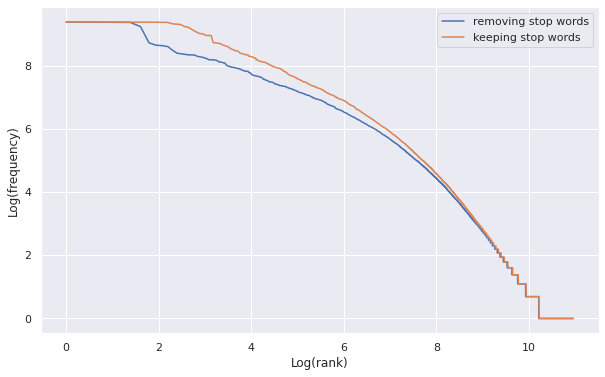

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))
axes.set_xlabel('Log(rank)')
axes.set_ylabel('Log(frequency)')
axes.plot(np.log(np.arange(len(sizes_df.values))), np.log(sizes_df.values), label='removing stop words')
axes.plot(np.log(np.arange(len(sizes2_df.values))), np.log(sizes2_df.values), label='keeping stop words')
axes.legend()

# Checking Heaps' law

In [15]:
with open('./IR_data_news_12k.json') as json_file:
    docs = json.load(json_file)

In [16]:
counted_tokens = []
for i in [500, 1000, 1500, 2000]:
    dictionary = set()
    j = 0
    count = 0
    for doc_id in docs:
        if j >= i:
            break
        text = docs[doc_id]['content']
        normalized_text = normalizer.normalize(text)
        tokens = tokenizer.tokenize_words(normalized_text)
        nonstop_tokens = []
        for token in tokens:
            if token not in PositionalIndex.stop_words:
                nonstop_tokens.append(token)
                dictionary.add(token)
        docs[doc_id]['tokens'] = nonstop_tokens
        count += len(nonstop_tokens)
        j += 1
    counted_tokens.append((count, len(dictionary)))

In [17]:
def func(x, k, b):
    return np.log10(k) + (x * b)

In [18]:
c1 = np.log10(np.array(counted_tokens))
min_max = [c1[:, 0].min(), c1[:, 0].max()]
x = np.array([min_max])
y = func(x, k=37, b=0.5)
line1 = np.concatenate([x, y]).T
line1

array([[4.88609009, 4.01124677],
       [5.49259697, 4.31450021]])

In [19]:
counted_tokens = []
for i in [500, 1000, 1500, 2000]:
    dictionary = set()
    j = 0
    count = 0
    for doc_id in docs:
        if j >= i:
            break
        text = docs[doc_id]['content']
        normalized_text = normalizer.normalize(text)
        tokens = tokenizer.tokenize_words(normalized_text)
        nonstop_tokens = []
        for token in tokens:
            if token not in PositionalIndex.stop_words:
                nonstop_tokens.append(token)
        stemmed_tokens = pd.Series(nonstop_tokens, dtype='object')\
            .apply(PositionalIndex.stemmer.convert_to_stem)\
            .values.tolist()
        for token in stemmed_tokens:
            dictionary.add(token)
        docs[doc_id]['tokens'] = stemmed_tokens
        count += len(stemmed_tokens)
        j += 1
    counted_tokens.append((count, len(dictionary)))

In [20]:
c = np.log10(np.array(counted_tokens))
min_max = [c[:, 0].min(), c[:, 0].max()]
x = np.array([min_max])
y = func(x, k=28.5, b=0.5)
line = np.concatenate([x, y]).T
line

array([[4.88609009, 3.8978899 ],
       [5.49259697, 4.20114335]])

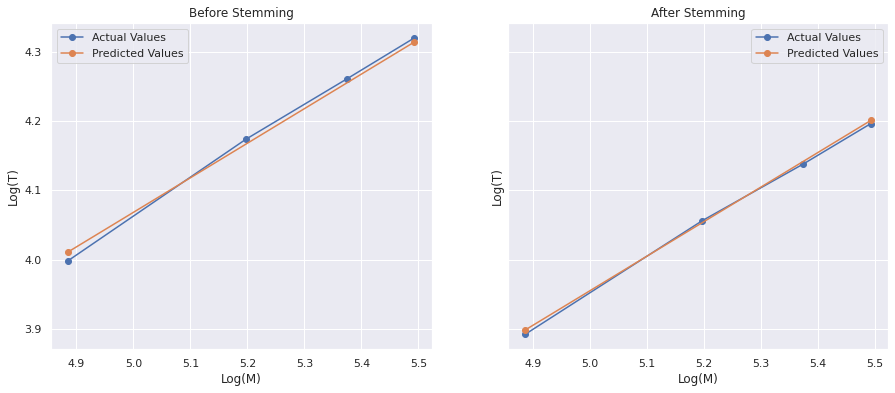

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharex=True, sharey=True)
ax[0].set_xlabel('Log(M)')
ax[0].set_ylabel('Log(T)')
ax[1].set_xlabel('Log(M)')
ax[1].set_ylabel('Log(T)')
ax[0].plot(c1[:, 0], c1[:, 1], label='Actual Values', marker='o')
ax[0].plot(line1[:, 0], line1[:, 1], label='Predicted Values', marker='o');
ax[0].set_title('Before Stemming')
ax[1].plot(c[:, 0], c[:, 1], label='Actual Values', marker='o')
ax[1].plot(line[:, 0], line[:, 1], label='Predicted Values', marker='o');
ax[1].set_title('After Stemming')
ax[0].legend()
ax[1].legend();

In [22]:
d = index.dictionary
print('After stemming:')
print('The whole vacabulary size is', len(d))
print('The whole tokens count is', sum([len(d[i]) for i in d]))

After stemming:
The whole vacabulary size is 57357
The whole tokens count is 1562938


In [23]:
counted_tokens = 0
dictionary = set()
for doc_id in docs:
    text = docs[doc_id]['content']
    normalized_text = normalizer.normalize(text)
    tokens = tokenizer.tokenize_words(normalized_text)
    nonstop_tokens = []
    for token in tokens:
        if token not in PositionalIndex.stop_words:
            nonstop_tokens.append(token)
            dictionary.add(token)
    counted_tokens += len(nonstop_tokens)
print('Before stemming:')
print('The whole vacabulary size is', len(dictionary))
print('The whole tokens count is', counted_tokens)

Before stemming:
The whole vacabulary size is 77889
The whole tokens count is 2653593


In [24]:
counted_tokens = 0
dictionary = set()
for doc_id in docs:
    text = docs[doc_id]['content']
    normalized_text = normalizer.normalize(text)
    tokens = tokenizer.tokenize_words(normalized_text)
    nonstop_tokens = []
    for token in tokens:
        if token not in PositionalIndex.stop_words:
            nonstop_tokens.append(token)
    stemmed_tokens = pd.Series(nonstop_tokens, dtype='object')\
            .apply(PositionalIndex.stemmer.convert_to_stem)\
            .values.tolist()
    for token in stemmed_tokens:
        dictionary.add(token)
    counted_tokens += len(stemmed_tokens)
print('After stemming:')
print('The whole vacabulary size is', len(dictionary))
print('The whole tokens count is', counted_tokens)

After stemming:
The whole vacabulary size is 57357
The whole tokens count is 2653593


# Queries

In [25]:
query = 'تحریم های آمریکا علیه ایران'
index.query(query).head(5)

,title,url,rank
9742,مرکز پژوهش‌های مجلس: مذاکرات وین به توافقی زود...,https://www.farsnews.ir/news/14000924000773/مر...,38
6929,توضیحات یک منبع آگاه درباره وقفه مذاکرات وین,https://www.farsnews.ir/news/14001222000450/تو...,31
8707,نباید مانند دولت گذشته در مذاکرات افراط کرد/ «...,https://www.farsnews.ir/news/14001024000193/نب...,22
11864,اهرم‌سازی از افغانستان در برجام/ نقطه عزیمت آم...,https://www.farsnews.ir/news/14000803000676/اه...,21
7731,نشست بررسی روند مذاکرات| آمریکا استاد دور زدن‌...,https://www.farsnews.ir/news/14001123000508/نش...,17


In [26]:
for doc_id in ['9742', '6929', '8707', '11864', '7731']:
    text = docs[doc_id]['content']
    sentences = tokenizer.tokenize_sentences(text)
    tokens = PositionalIndex.preprocess(query)
    for sentence in sentences:
        for token in tokens:
            found = False
            if token in sentence:
                print(sentence)
                found = True
            if found:
                break

به گزارش خبرگزاری فارس، مرکز پژوهش‌های مجلس شورای اسلامی در گزارشی با عنوان «مذاکرات وین: تقابل اراده‌ها و جنگ روایت‌ها» به موضوع مذاکرات اخیر ایران با 1+4 پرداخت .
  در بخش چکیده این گزارش آمده است: انگیزه اصلی جمهوری اسلامی ایران برای ورود به مذاکرات وین، تحقق هدف مندرج در بند «29» برجام یعنی «عادی‌سازی روابط اقتصادی و تجاری» بود .
 با این‌حال، نتایج 6 دور اول گفتگوهای وین به‌دلیل عدم اراده آمریکا برای لغو مؤثر همه تحریم‌ها و ارائه تضمین به‌لحاظ اقتصادی، منافع ملی جمهوری اسلامی ایران را تأمین نمی‌کرد .
  به‌دلیل عدم انتفاع اقتصادی، تجدیدنظر درباره پیش‌نویس 6 دور قبلی مذاکرات یک ضرورت برای جمهوری اسلامی ایران محسوب می‌شد، ولی آمریکا ـ حتی پیش از تدوین متن جدید در تهران ـ با ایجاد کمپین روانی خواسته ایران را «زیاده‌خواهانه و فرابرجامی» معرفی کرد .
 درحالی که، طبق برجام و قطعنامه 2231، آمریکا علاوه‌بر رفع تحریم‌های مقرر در ضمیمه 2 برجام باید از اتخاذ اقداماتی که مانع از عادی‌سازی روابط اقتصادی و تجاری با ایران می‌شود، خودداری نماید .
 آمریکا برای تغییر محاسبه جمهوری اسلامی ایران و وادار

In [27]:
query = 'تحریم های آمریکا ! ایران'
index.query(query).head(5)

,title,url,rank
8282,خطیب جمعه تهران: سازمان‌ همکاری اسلامی در براب...,https://www.farsnews.ir/news/14001108000202/خط...,4
7491,مسائل اقتصادی کشور را معطل نتیجه مذاکرات نمی‌‌...,https://www.farsnews.ir/news/14001203000383/مس...,3
7252,تجربه نشان داده به عهد آمریکا در مذاکرات نمی‌ش...,https://www.farsnews.ir/news/14001203000366/تج...,2
9994,امام جمعه موقت تهران: مذاکره کنونی با گذشته که...,https://www.farsnews.ir/news/14000919000137/ام...,2
6878,انتقاد دانشجویان ایرانی در اروپا به برخورد دوگ...,https://www.farsnews.ir/news/14001224000014/ان...,2


In [28]:
stop_words = PositionalIndex.stop_words.union({'!'})
for doc_id in ['8282', '7491', '7252', '9994', '6878']:
    text = docs[doc_id]['content']
    sentences = tokenizer.tokenize_sentences(text)
    tokens = PositionalIndex.preprocess(query)
    for sentence in sentences:
        for token in tokens:
            found = False
            if token not in stop_words and token in sentence:
                print(sentence)
                found = True
            if found:
                break

 * لزوم شکران نعمت انقلاب/ تمام تحریم‌ها باید لغو شود امام جمعه موقت تهران، همچنین با اشاره به چهل و سومین سالگرد پیروزی انقلاب اسلامی اظهار داشت: دهه فجر از مصادیق ایام‌الله است؛ یعنی روزهایی که خداوند نعمت ویژه‌ای به مردم داده است و جز با عنایت خداوند، این انقلاب پیروز نمی‌شد .
 خاتمی افزود: تمام دنیا اعم از آمریکا و شوروی و اروپایی‌ها پشت سر شاه بودند،‌ اما مرگ بر شاه گفتن‌های شما مردم باعث شد که شاه برود .
 وی به مذاکرات لغو تحریم‌ها هم اشاره کرد و گفت: آمریکا در پی غارتگری است، نه مذاکره؛ آمریکا خواب و خیال غارتگری قبل از انقلاب را دارد و این خواب هرگز تعبیر نشده و نخواهد شد .
 امام جمعه موقت تهران افزود: آمریکا در طول این 43 سال هرچه توانست بر علیه این انقلاب توطئه کرد و اگر هم توطئه‌ای نکرده، چون نتوانسته، نه اینکه نخواسته است .
 خاتیم تصریح کرد: آنها مدام بر تحریم‌ها افزوده‌اند، خط رهبری در این حوزه روشن است؛ باید تمام تحریم‌ها اعم از هسته‌ای و حقوق بشری و  ...
 خاتمی گفت: قانون اساسی می‌گوید با تمام دنیا می‌توانیم بر اساس منافع متقابل ارتباط داشته باشیم و با رژیم صهیونیستی هیچ

In [29]:
query = '"کنگره ضدتروریست"'
index.query(query).head(5)

,title,url,rank
6929,توضیحات یک منبع آگاه درباره وقفه مذاکرات وین,https://www.farsnews.ir/news/14001222000450/تو...,1


In [30]:
for doc_id in ['6929']:
    text = docs[doc_id]['content']
    sentences = tokenizer.tokenize_sentences(text)
    tokens = PositionalIndex.preprocess(query)
    for sentence in sentences:
        for token in tokens:
            found = False
            if token not in stop_words and token in sentence:
                print(sentence)
                found = True
            if found:
                break

 نمایندگان کنگره در واکنش به خریدهای‌ نفت اداره‌ی انرژی آمریکا از ایران، لایحه‌ای به‌ مجلس برده و با تصویب آن واردات نفت از ایران‌ را ممنوع کردند .
   ریگان که نمی‌خواست کمتر از کنگره ضدتروریست جلوه کند، 3هفته بعد با صدور دستور ویژه‌ی (12613) ورود هرگونه کالا و خدمات از ایران را ممنوع کرد .
 در این دوران آمریکا سیاست‌های ضد ایرانی خود را ادامه داد به گونه‌ای که در مرداد 1375 قانون مجازات‌ها برضد ایران و لیبی در کنگره تصویب شد .
افزون بر این‌ها، قانون تحریم همه ‌جانبه‌ی ایران در سال 1389 به تصویب کنگره‌ی این کشور رسید .


In [31]:
query = '"فدراسیون فوتبال"'
query += ' ایران '
query += ' ! '
query += 'خارجی'
a = index.query(query).head(5)
a

,title,url,rank
5268,توضیح فدراسیون فوتبال درمورد لزوم اصلاح اساسنا...,https://www.farsnews.ir/news/14001017000146/تو...,19
2788,اصولی: فدراسیون فوتبال جمهوری اسلامی ایران هست...,https://www.farsnews.ir/news/14001117000518/اص...,14
4918,عزیزی خادم: فوتبال ایران از وضعیت اسفبار گذشته...,https://www.farsnews.ir/news/14001021000577/عز...,14
1974,اخبار مهم جلسه 9 ساعته مدیران فدراسیون| اصولی:...,https://www.farsnews.ir/news/14001128000761/اخ...,13
2626,ماجدی:فدراسیون فوتبال بدون حمایت مجلس و دولت ک...,https://www.farsnews.ir/news/14001119000114/ما...,12


In [32]:
for doc_id in a.index:
    text = docs[str(doc_id)]['content']
    sentences = tokenizer.tokenize_sentences(text)
    tokens = PositionalIndex.preprocess(query)
    for sentence in sentences:
        if 'فدراسیون فوتبال' in sentence and 'ایران' in sentence and 'خارجی' not in sentence:
            print(sentence)
            found = True

 از سال 1386 که بحث تعلیق فوتبال ایران مطرح شد اساسنامه فدارسیون‌های ورزشی آماتوری که در 32 ماده و مصوبه هیأت محترم وزیران بوده در فدراسیون فوتبال موجود نیست .
  رئیس فدراسیون فوتبال ایران در این مراسم با اشاره به ظرفیت فوتبال گیلان اظهار کرد: مرحوم قایقران یکی از اسطوره‌های اخلاق و فنی کشورمان بودند و حیف است که در بین ما حضور دارند و فوتبال گیلان ظرفیت بالایی دارد، بازیکنان مثل علی کریمی و علیرضا جهانبخش نیز از این استان هستند .
  رئیس فدراسیون فوتبال ایران پیروزی‌های تیم ملی را غرورآفرین دانست و تصریح کرد: پیروزی‌های اخیر تیم ملی فوتبال ایران را تبریک عرض می‌گویم و تیم‌های استانی در همه جای کشور کمک‌های زیادی برای رشد و توسعه فوتبال کشور انجام داده‌اند .
  رئیس فدراسیون فوتبال با اسفبار خواندن شرایط گذشته فوتبال ایران افزود: وضعیت فوتبال ایران درگذشته بسیار سخت و اسفبار بود که از این مرحله گذشته‌ایم و عادت به باختن و عدم نتیجه‌گیری وجود ندارد و هر ایرانی در هر نقطه از ایران به خود می‌بالد که در قاره کهن آسیا می‌درخشیم و افتخار می‌کنیم که به‌عنوان عضوی از جامعه فوتبال خوشحالیم و امید

# Phase 2

In [34]:
doc1 = index.documents[0]
doc2 = index.documents[1]
index.get_cosine_similarity(doc1, doc2)

/home/mahdi/PycharmProjects/IRP01/positional_index/index.py:160: RuntimeWarning: divide by zero encountered in log
  tf = 1 + np.log(postings_list.get_term_frequency(doc_id))


0.2011356791150753